In [1]:
import pandas as pd


# Load the language df
df = pd.read_csv('../data/cleaned/oc_corroborated_langdata.csv')

df.head()

,doi,id,title,publication_year,language,type,type_crossref,open_access,accepted,published,country,cited_by_count,field,subfield
0,10.1007/s40274-019-6237-3,1,SC insulin infusion pump in T1DM: health gains...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,"Endocrinology, Diabetes and Metabolism"
1,10.1007/s40274-019-6231-9,2,Modelling approaches should be justified in ec...,2019,en,article,journal-article,False,False,False,NaN,0,"Economics, Econometrics and Finance",Economics and Econometrics
2,10.1007/s40274-019-6225-7,4,Ferric carboxymaltose for iron deficiency in d...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,Hematology
3,10.1007/s40274-019-6223-9,5,ED-SAFE intervention cost effective for suicid...,2019,en,article,journal-article,False,False,False,NaN,0,Psychology,Clinical Psychology
4,10.1007/s40274-019-6224-8,7,Fecal transplants cost effective for recurrent...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,Infectious Diseases


In [2]:
# Calculate the frequency of each field and language
field_counts = df['field'].value_counts(normalize=True) * 100
language_counts = df['language'].value_counts(normalize=True) * 100

# Get the top 5 fields and languages
top_fields = field_counts.head(5)
top_languages = language_counts.head(5)

# Combine the results into a single DataFrame
top_summary = pd.concat([top_fields, top_languages], axis=1, keys=['Field', 'Language']).fillna(0)

top_summary

,Field,Language
Medicine,23.760051,0.000000
Engineering,13.244754,0.000000
"Biochemistry, Genetics and Molecular Biology",8.641960,0.000000
Social Sciences,7.087015,0.000000
Computer Science,5.537115,0.000000
en,0.000000,96.875180
tr,0.000000,0.686574
es,0.000000,0.612651
de,0.000000,0.374104
fr,0.000000,0.323155


In [3]:
# Calculate the frequency of each field and language
field_counts = df['field'].value_counts(normalize=False)
language_counts = df['language'].value_counts(normalize=False)

language_counts

language
en       7189297
tr         50952
es         45466
de         27763
fr         23982
pt         20820
id         18490
ru          8438
uk          6887
ko          5116
ja          4343
pl          3975
it          2348
cs          1431
no          1429
hu          1196
ro          1166
nl          1121
ca          1095
vi           674
zh-cn        608
sl           557
da           529
hr           423
tl           406
sv           378
ar           376
sk           299
af           296
et           243
fi           197
lt           190
bg           140
cy           134
fa            96
mk            70
el            68
ng            51
sw            50
so            27
sq            25
lv            15
th             9
hi             8
gu             5
zh-tw          4
bn             2
he             1
Name: count, dtype: int64

In [4]:
res_05 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.5_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.5_i2_stats.csv')

res_05.head()

/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_19132/3146717765.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_05 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.5_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.5_i2_stats.csv')


,cluster,n,m,modularity,cpm_score,connectivity,connectivity_normalized_log10(n),connectivity_normalized_log2(n),connectivity_normalized_sqrt(n)/5,conductance
0,344947,2,1,3.775727e-08,0.5,1.0,3.321928,1.00000,3.535534,0.950000
1,49422,4,5,1.887839e-07,2.0,2.0,3.321928,1.00000,5.000000,0.918033
2,110238,3,3,1.132711e-07,1.5,2.0,4.191807,1.26186,5.773503,0.927711
3,344948,2,1,3.775772e-08,0.5,1.0,3.321928,1.00000,3.535534,0.894737
4,344949,2,1,3.775775e-08,0.5,1.0,3.321928,1.00000,3.535534,0.875000


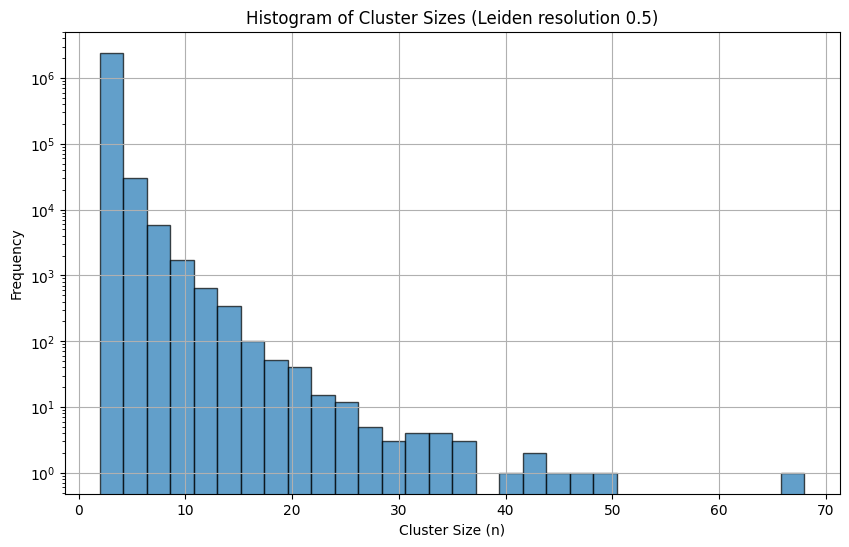

In [5]:
import matplotlib.pyplot as plt

# Remove the last row of the DataFrame
res_05 = res_05[:-1]

# Plot a histogram of cluster sizes with Leiden resolution 0.5
plt.figure(figsize=(10, 6))
plt.hist(res_05['n'], bins=30, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.title('Histogram of Cluster Sizes (Leiden resolution 0.5)')
plt.xlabel('Cluster Size (n)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_19132/1193618558.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.1_i2_stats.csv')


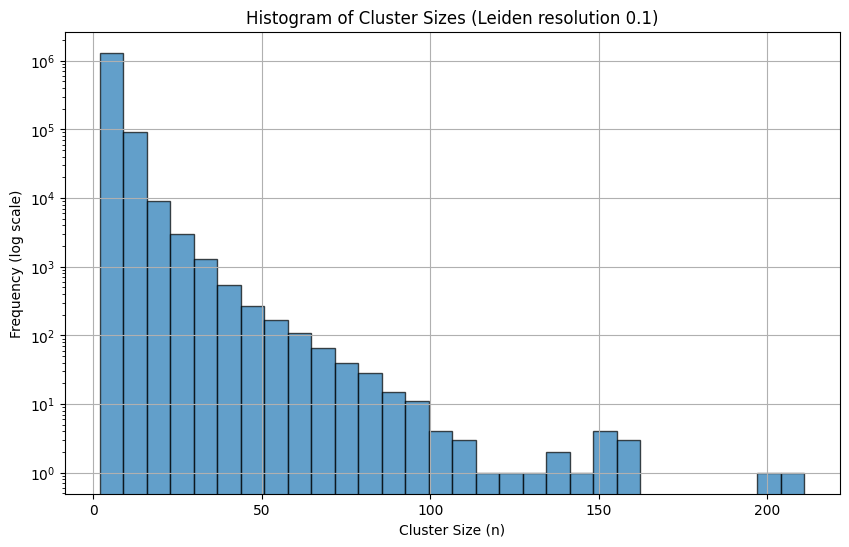

In [6]:
def plot_hist(df, res):
    # Remove the last row of the DataFrame
    df = df[:-1]

    # Plot a histogram of cluster sizes with Leiden resolution 0.5 and log scaling on the y-axis
    plt.figure(figsize=(10, 6))
    plt.hist(df['n'], bins=30, edgecolor='k', alpha=0.7)
    plt.yscale('log')
    plt.title(f'Histogram of Cluster Sizes (Leiden resolution {res})')
    plt.xlabel('Cluster Size (n)')
    plt.ylabel('Frequency (log scale)')
    plt.grid(True)
    plt.show()
    
res_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.1_i2_stats.csv')
plot_hist(res_01, 0.1)

/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_19132/3433370260.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.01_i2_stats.csv')


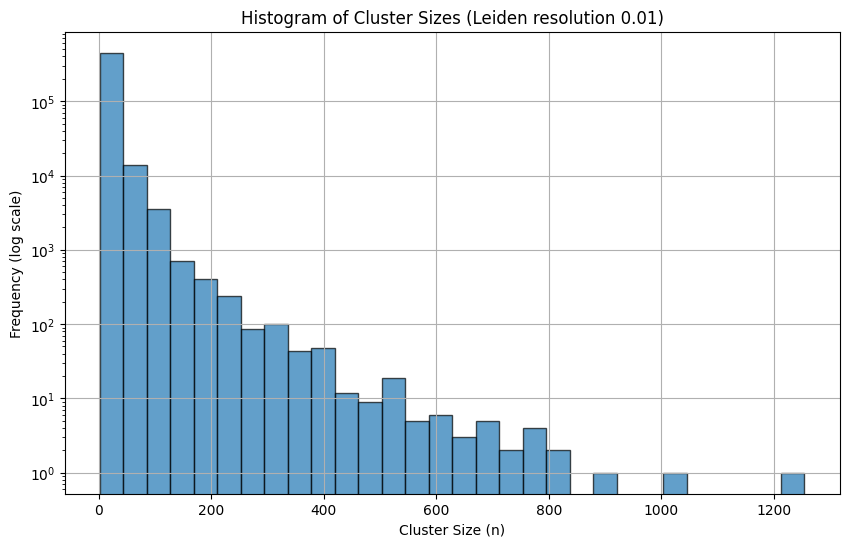

In [7]:
res_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.01_i2_stats.csv')
plot_hist(res_001, 0.01)

/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_19132/3777227023.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_0001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.001_i2_stats.csv')


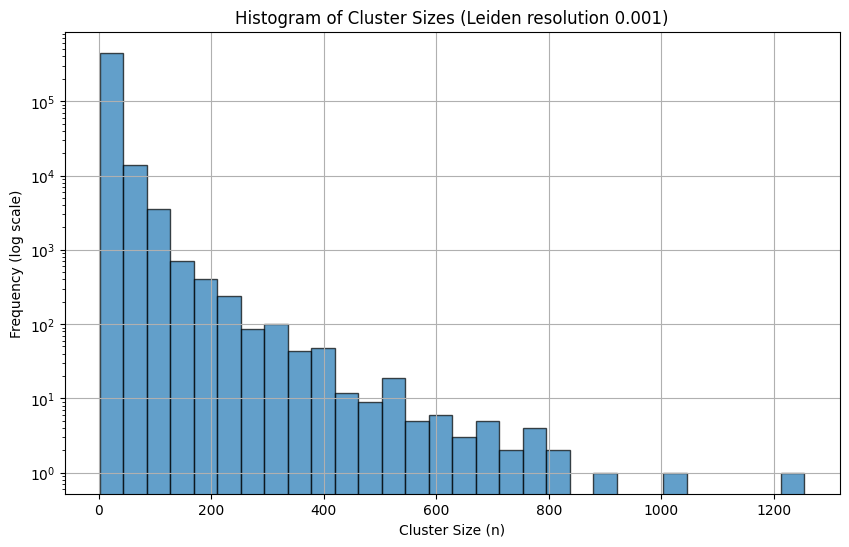

In [8]:
res_0001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.001_i2_stats.csv')
plot_hist(res_001, 0.001)

In [9]:
comp_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.1_i2_clustering_cluster_comp.csv')
comp_01.head()

,cluster_id,Agricultural and Biological Sciences,Arts and Humanities,"Biochemistry, Genetics and Molecular Biology","Business, Management and Accounting",Chemical Engineering,Chemistry,Computer Science,Decision Sciences,Dentistry,...,sq,sv,sw,th,tl,tr,uk,vi,zh-cn,zh-tw
0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.000000,0.0,0.0,0.0,1.234568,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,1.840491,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
comp_05 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.5_i2/S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.5_i2_clustering_cluster_comp.csv')
comp_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.01_i2_clustering_cluster_comp.csv')
comp_0001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.001_i2_clustering_cluster_comp.csv')


In [11]:
# Combine 'zh-cn' and 'zh-tw' into a single column 'zh'
comp_01['zh'] = comp_01[['zh-cn', 'zh-tw']].sum(axis=1)

# Drop the original 'zh-cn' and 'zh-tw' columns
comp_01 = comp_01.drop(columns=['zh-cn', 'zh-tw'])

In [12]:
field_columns = [col for col in comp_01.columns if len(col) > 2 and col != 'cluster_id']
print(field_columns)

['Agricultural and Biological Sciences', 'Arts and Humanities', 'Biochemistry, Genetics and Molecular Biology', 'Business, Management and Accounting', 'Chemical Engineering', 'Chemistry', 'Computer Science', 'Decision Sciences', 'Dentistry', 'Earth and Planetary Sciences', 'Economics, Econometrics and Finance', 'Energy', 'Engineering', 'Environmental Science', 'Health Professions', 'Immunology and Microbiology', 'Materials Science', 'Mathematics', 'Medicine', 'Neuroscience', 'Nursing', 'Pharmacology, Toxicology and Pharmaceutics', 'Physics and Astronomy', 'Psychology', 'Social Sciences', 'Veterinary']


In [13]:
print(comp_01['en'][:10])

0    100.000000
1    100.000000
2    100.000000
3    100.000000
4    100.000000
5    100.000000
6     99.350649
7     99.346405
8    100.000000
9    100.000000
Name: en, dtype: float64


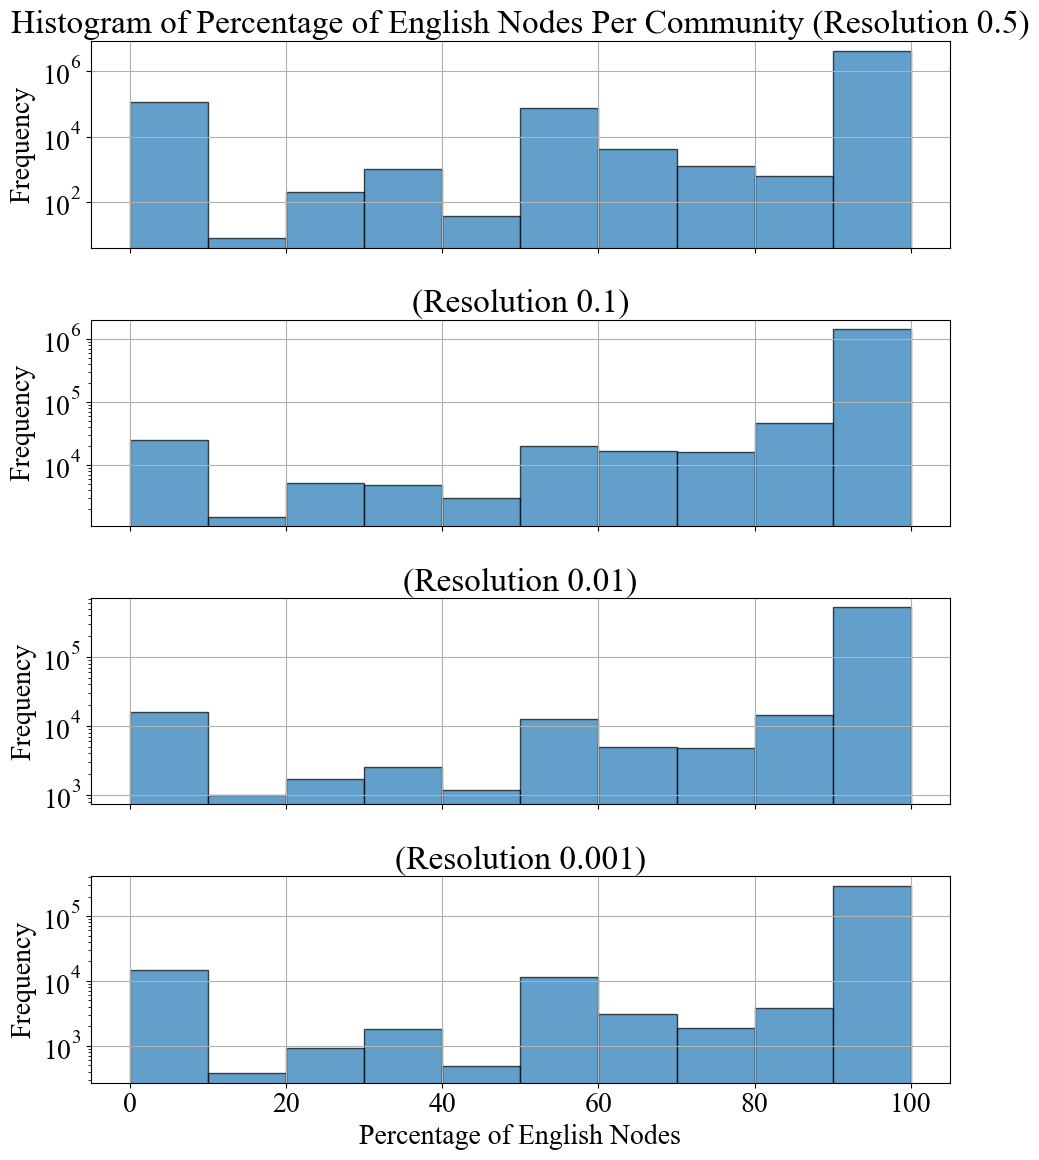

In [14]:
import matplotlib as mpl

# Plot the histogram
percent_en_05 = comp_05['en']
percent_en_01 = comp_01['en']
percent_en_001 = comp_001['en']
percent_en_0001 = comp_0001['en']

# Filter out 100s from each resolution
# percent_en_05 = percent_en_05[percent_en_05 < 100]
# percent_en_01 = percent_en_01[percent_en_01 < 100]
# percent_en_001 = percent_en_001[percent_en_001 < 100]
# percent_en_0001 = percent_en_0001[percent_en_0001 < 100]

# Set global font properties
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 20  # Increase the font size

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot histograms
axes[0].hist(percent_en_05, bins=10, edgecolor='k', alpha=0.7)
axes[0].set_ylabel('Frequency')
axes[0].set_yscale('log')
axes[0].set_title('Histogram of Percentage of English Nodes Per Community (Resolution 0.5)')
axes[0].grid(True)

axes[1].hist(percent_en_01, bins=10, edgecolor='k', alpha=0.7)
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')
axes[1].set_title('(Resolution 0.1)')
axes[1].grid(True)

axes[2].hist(percent_en_001, bins=10, edgecolor='k', alpha=0.7)
axes[2].set_ylabel('Frequency')
axes[2].set_yscale('log')
axes[2].set_title('(Resolution 0.01)')
axes[2].grid(True)

axes[3].hist(percent_en_0001, bins=10, edgecolor='k', alpha=0.7)
axes[3].set_xlabel('Percentage of English Nodes')
axes[3].set_ylabel('Frequency')
axes[3].set_yscale('log')
axes[3].set_title('(Resolution 0.001)')
axes[3].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
# Save the plot as a PDF
plt.savefig("percent_english_nodes.pdf", format="pdf", bbox_inches='tight')
plt.show()

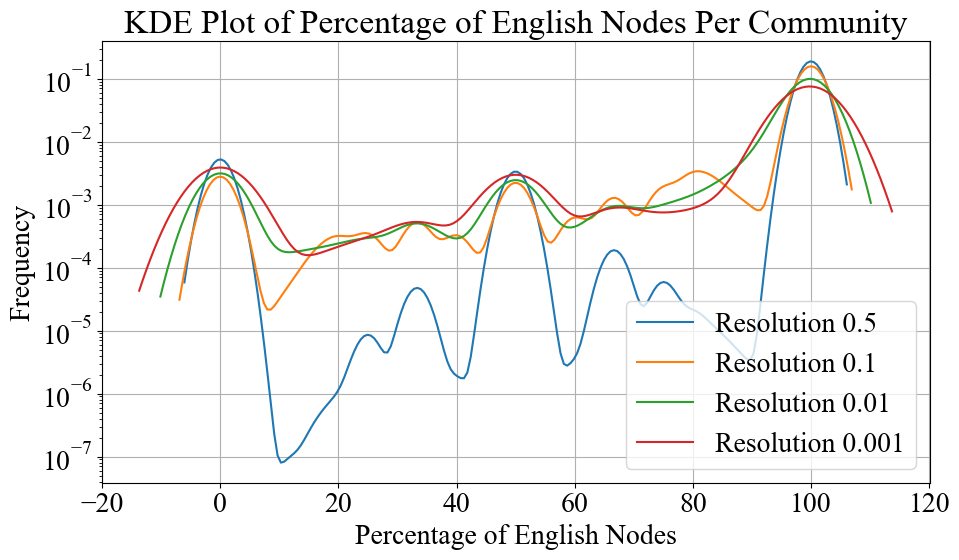

In [15]:
import numpy as np
import seaborn as sns

# Instead of the stacked plots in the previous cell, overlap the histograms with transparency into a single plot
plt.figure(figsize=(10, 6))

# Plot histograms with transparency
# plt.hist(percent_en_05, bins=bins, edgecolor='k', alpha=0.4, label='Resolution 0.5', density=True)
# plt.hist(percent_en_01, bins=bins, edgecolor='k', alpha=0.3, label='Resolution 0.1', density=True)
# plt.hist(percent_en_001, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.01', density=True)
# plt.hist(percent_en_0001, bins=bins, edgecolor='k', alpha=0.1, label='Resolution 0.001', density=True)

# Plot density curves
sns.kdeplot(percent_en_05, bw_adjust=2.5, label='Resolution 0.5', linestyle='-')
sns.kdeplot(percent_en_01, bw_adjust=2.5, label='Resolution 0.1', linestyle='-')
sns.kdeplot(percent_en_001, bw_adjust=2.5, label='Resolution 0.01', linestyle='-')
sns.kdeplot(percent_en_0001, bw_adjust=2.5, label='Resolution 0.001', linestyle='-')

plt.xlabel('Percentage of English Nodes')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('KDE Plot of Percentage of English Nodes Per Community')
plt.legend()

plt.grid(True)

# Tighten the layout to avoid overlap
plt.tight_layout()

# Save the plot as a PDF
plt.savefig("percent_english_nodes_overlap.pdf", format="pdf", bbox_inches='tight')
plt.show()


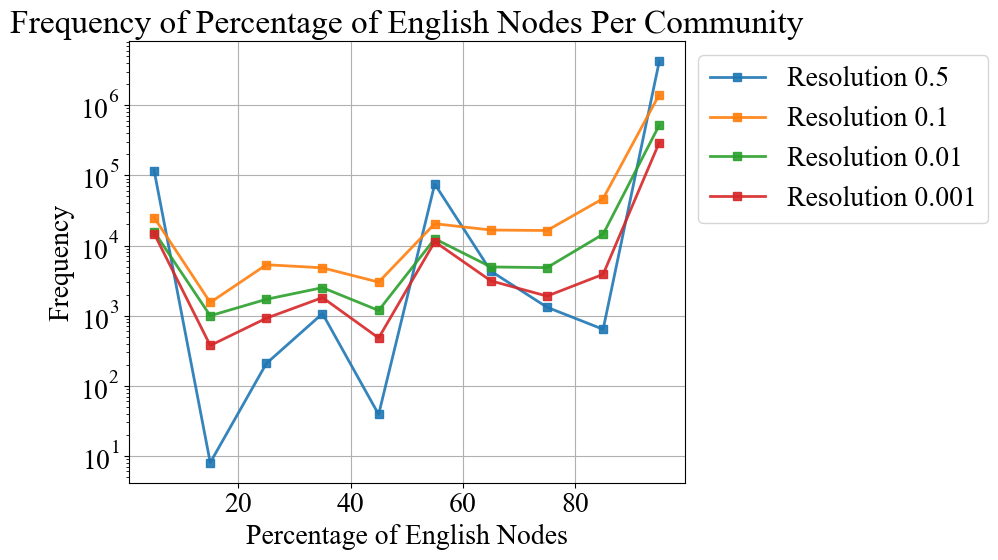

In [16]:
# Instead of the stacked plots in the previous cell, overlap the histograms with transparency into a single plot
plt.figure(figsize=(10, 6))

# Plot side by side bars and a curve for each distribution
bins = np.linspace(0, 100, 11)  # Define the bins for the histogram

# plt.hist(percent_en_05, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.5')
# plt.hist(percent_en_01, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.1')
# plt.hist(percent_en_001, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.01')
# plt.hist(percent_en_0001, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.001')

# Connect points on the histogram with line segments
# Calculate the midpoints of the bins
bin_midpoints = (bins[:-1] + bins[1:]) / 2

# Plot the lines with square points
plt.plot(bin_midpoints, np.histogram(percent_en_05, bins=bins)[0], label='Resolution 0.5', linestyle='-', marker='s', color='tab:blue', alpha=0.9, linewidth=2)
plt.plot(bin_midpoints, np.histogram(percent_en_01, bins=bins)[0], label='Resolution 0.1', linestyle='-', marker='s', color='tab:orange', alpha=0.9, linewidth=2)
plt.plot(bin_midpoints, np.histogram(percent_en_001, bins=bins)[0], label='Resolution 0.01', linestyle='-', marker='s', color='tab:green', alpha=0.9, linewidth=2)
plt.plot(bin_midpoints, np.histogram(percent_en_0001, bins=bins)[0], label='Resolution 0.001', linestyle='-', marker='s', color='tab:red', alpha=0.9, linewidth=2)

plt.xlabel('Percentage of English Nodes')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Frequency of Percentage of English Nodes Per Community')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)

# Tighten the layout to avoid overlap
plt.tight_layout()

# Save the plot as a PDF
plt.savefig("percent_english_nodes_overlap2.pdf", format="pdf", bbox_inches='tight')

plt.show()

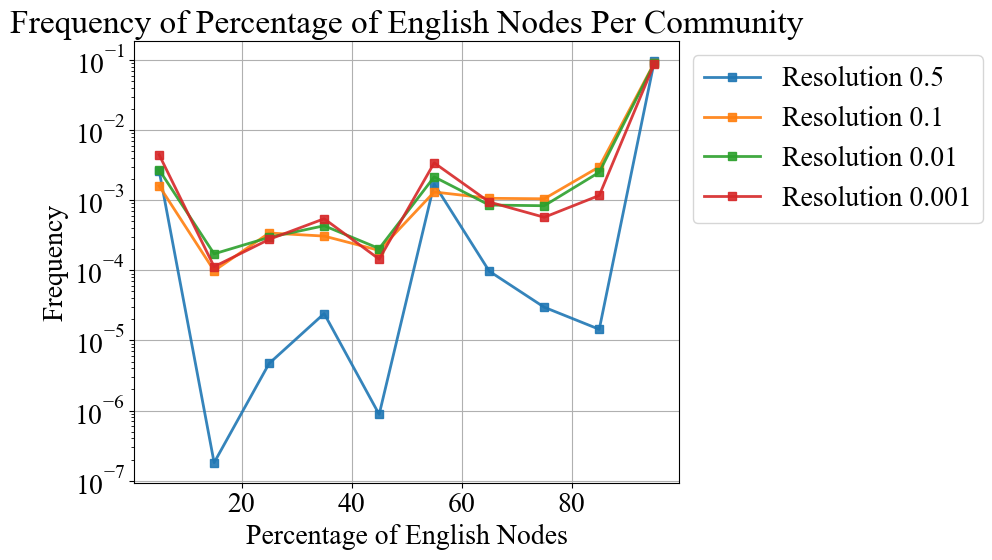

In [17]:
# Instead of the stacked plots in the previous cell, overlap the histograms with transparency into a single plot
plt.figure(figsize=(10, 6))

# Plot side by side bars and a curve for each distribution
bins = np.linspace(0, 100, 11)  # Define the bins for the histogram

# plt.hist(percent_en_05, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.5')
# plt.hist(percent_en_01, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.1')
# plt.hist(percent_en_001, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.01')
# plt.hist(percent_en_0001, bins=bins, edgecolor='k', alpha=0.2, label='Resolution 0.001')

# Connect points on the histogram with line segments
# Calculate the midpoints of the bins
bin_midpoints = (bins[:-1] + bins[1:]) / 2

# Plot the lines with square points
plt.plot(bin_midpoints, np.histogram(percent_en_05, bins=bins, density=True)[0], label='Resolution 0.5', linestyle='-', marker='s', color='tab:blue', alpha=0.9, linewidth=2)
plt.plot(bin_midpoints, np.histogram(percent_en_01, bins=bins, density=True)[0], label='Resolution 0.1', linestyle='-', marker='s', color='tab:orange', alpha=0.9, linewidth=2)
plt.plot(bin_midpoints, np.histogram(percent_en_001, bins=bins, density=True)[0], label='Resolution 0.01', linestyle='-', marker='s', color='tab:green', alpha=0.9, linewidth=2)
plt.plot(bin_midpoints, np.histogram(percent_en_0001, bins=bins, density=True)[0], label='Resolution 0.001', linestyle='-', marker='s', color='tab:red', alpha=0.9, linewidth=2)

plt.xlabel('Percentage of English Nodes')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Frequency of Percentage of English Nodes Per Community')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)

# Tighten the layout to avoid overlap
plt.tight_layout()

# Save the plot as a PDF
plt.savefig("percent_english_nodes_overlap_norm.pdf", format="pdf", bbox_inches='tight')

plt.show()

In [18]:
comp_05['most_common_field'] = comp_05[field_columns].idxmax(axis=1)

/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_19132/377152192.py:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  comp_05['most_common_field'] = comp_05[field_columns].idxmax(axis=1)


In [19]:
comp_05['most_common_field'].head()

0              Engineering
1        Materials Science
2    Physics and Astronomy
3        Materials Science
4    Physics and Astronomy
Name: most_common_field, dtype: object

/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_19132/2360320747.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = comp_05.groupby(['most_common_field', 'bin']).size().unstack(fill_value=0)


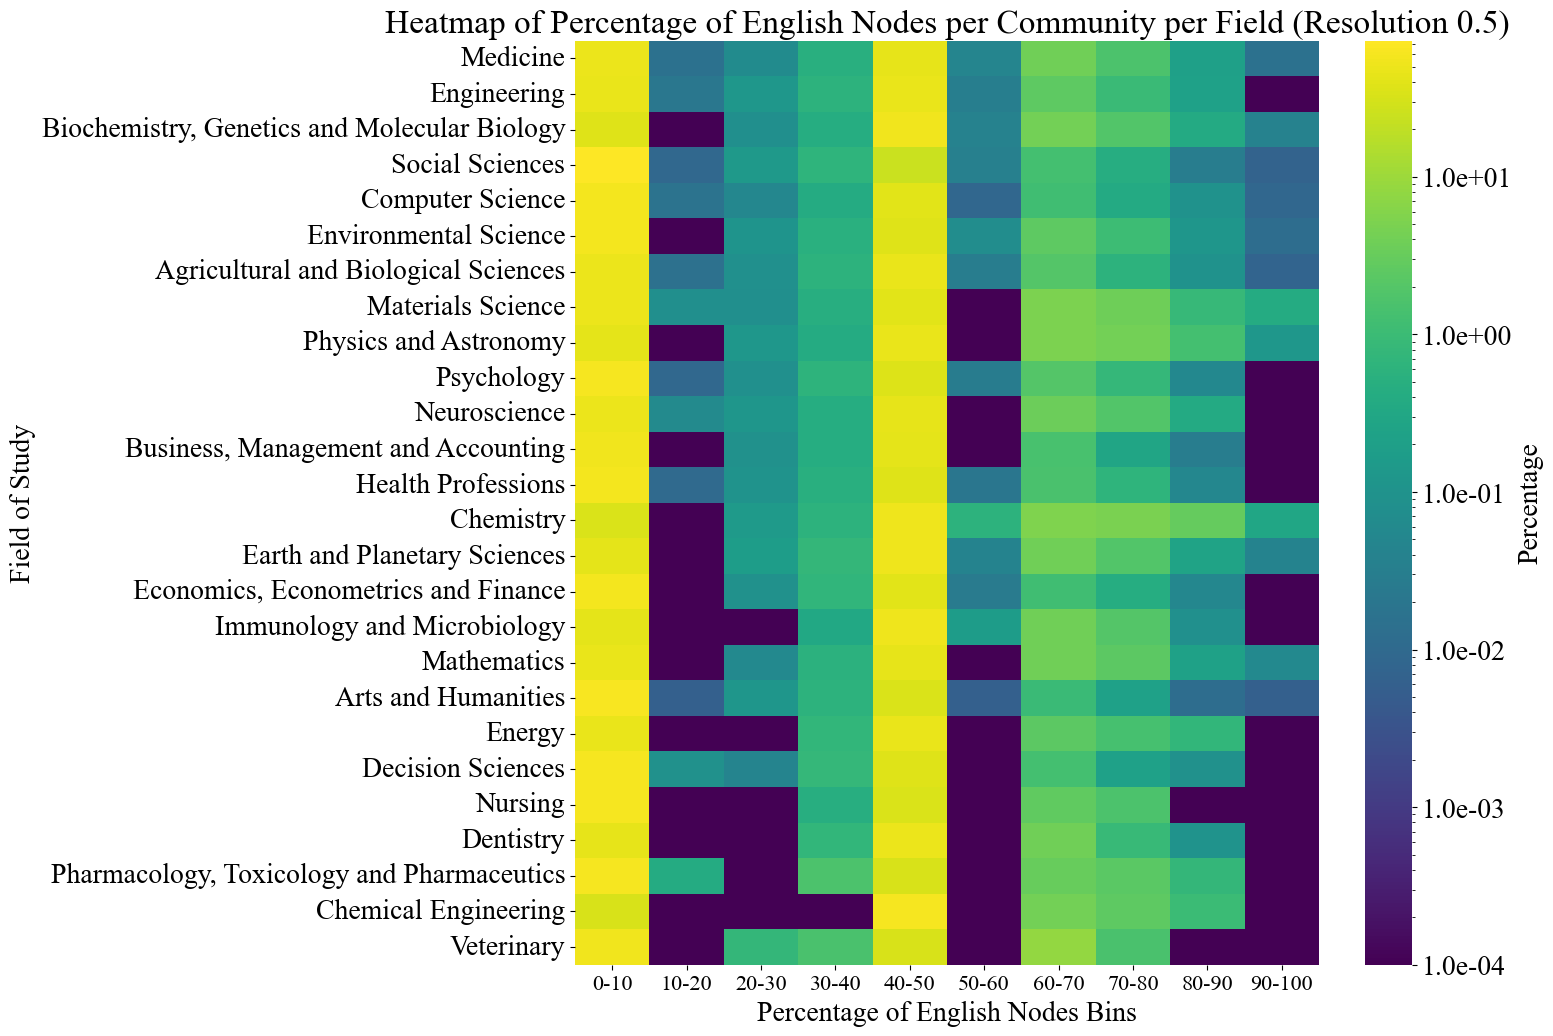

In [20]:
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.colors as mcolors  # Import colors module

bins = np.linspace(0, 100, 11)  # 10 bins from 0 to 100
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

# Bin the percentage of English nodes
comp_05['bin'] = pd.cut(comp_05['en'], bins=bins, labels=bin_labels, include_lowest=True)

# Remove 100% english communities
comp_05 = comp_05[comp_05['en'] < 100]

# Aggregate data: count of nodes in each bin per field
bin_counts = comp_05.groupby(['most_common_field', 'bin']).size().unstack(fill_value=0)

# Only select the top 5 fields
top_fields = field_counts.index
bin_counts = bin_counts.loc[top_fields]

# Normalize each row to percentage
bin_percentages = bin_counts.div(bin_counts.sum(axis=1), axis=0) * 100

# Add a small constant to avoid log(0) issues
bin_percentages += 1e-10

# Determine the range of data to use in LogNorm
vmin = bin_percentages.min().min()  # Minimum value
vmax = bin_percentages.max().max()  # Maximum value

plt.figure(figsize=(12, 12))
sns.heatmap(bin_percentages, 
            cmap='viridis', 
            norm=mcolors.LogNorm(vmin=max(vmin, 1e-4), vmax=min(vmax, 1e2)),  # Adjust for your range
            cbar_kws={'label': 'Percentage', 'format': '%.1e'})  # Adjust normalization range
plt.xlabel('Percentage of English Nodes Bins')
plt.ylabel('Field of Study')
plt.title('Heatmap of Percentage of English Nodes per Community per Field (Resolution 0.5)')

# Make font bigger
plt.xticks(fontsize=16)

# Save the plot as a PDF
plt.savefig("heatmap.png", bbox_inches='tight')
plt.show()

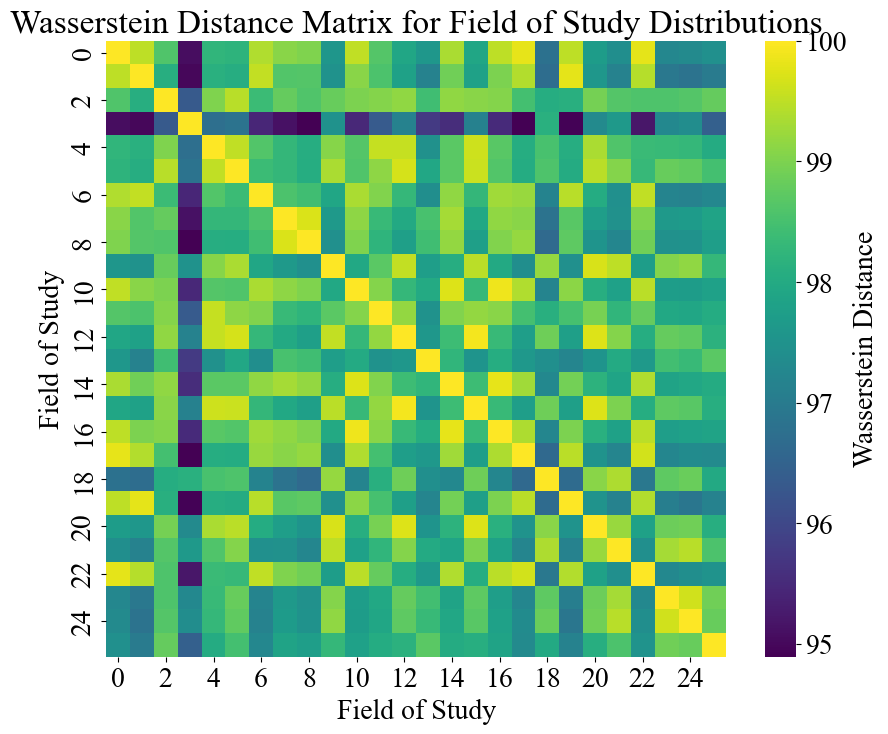

In [69]:
import numpy as np
from scipy import stats

# Example matrix with three different probability distributions
example_matrix = bin_percentages.to_numpy()

# # Select two rows to compare
dist1 = example_matrix[0] 
dist2 = example_matrix[1] 

# Normalize the distributions
dist1 /= dist1.sum()
dist2 /= dist2.sum()

wasserstein_dists = np.zeros((example_matrix.shape[0], example_matrix.shape[0]))

# Calculate the Wasserstein distance between each pair of distributions
for i in range(example_matrix.shape[0]):
    for j in range(example_matrix.shape[0]):
        wasserstein_dists[i, j] = 100 - stats.wasserstein_distance(example_matrix[i], example_matrix[j]) * 100

# Plot the Wasserstein Distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(wasserstein_dists, cmap='viridis', annot=False, fmt='.2f', cbar_kws={'label': 'Wasserstein Distance'})
plt.xlabel('Field of Study')
plt.ylabel('Field of Study')
plt.title('Wasserstein Distance Matrix for Field of Study Distributions')
plt.show()

# Plot the p-value matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(ps, cmap='viridis', annot=False, fmt='.2e', cbar_kws={'label': 'p-value'})
# plt.xlabel('Field of Study')
# plt.ylabel('Field of Study')
# plt.title('p-value Matrix for Field of Study Distributions')
# plt.show()


In [68]:
print(bin_percentages)

bin                                               0-10         10-20  \
field                                                                  
Medicine                                      0.483302  1.533319e-04   
Engineering                                   0.478549  2.072539e-04   
Biochemistry, Genetics and Molecular Biology  0.384167  1.000000e-12   
Social Sciences                               0.729716  9.093596e-05   
Computer Science                              0.571912  1.737016e-04   
Environmental Science                         0.572189  1.000000e-12   
Agricultural and Biological Sciences          0.502374  1.483680e-04   
Materials Science                             0.485849  7.861635e-04   
Physics and Astronomy                         0.412371  1.000000e-12   
Psychology                                    0.603744  9.132420e-05   
Neuroscience                                  0.503343  6.079027e-04   
Business, Management and Accounting           0.551157  1.000000

In [51]:
print(results)

{'chi_square': {'statistic': 56.192539684051496, 'p_value': 7.211874241578313e-09, 'significant': True}, 'ks_test': {'statistic': 0.020390560203905617, 'p_value': 0.030856726787694355, 'significant': True}, 'total_variation_distance': 0.025287096905668216}


In [ ]:
print(field_columns)

['Agricultural and Biological Sciences', 'Arts and Humanities', 'Biochemistry, Genetics and Molecular Biology', 'Business, Management and Accounting', 'Chemical Engineering', 'Chemistry', 'Computer Science', 'Decision Sciences', 'Dentistry', 'Earth and Planetary Sciences', 'Economics, Econometrics and Finance', 'Energy', 'Engineering', 'Environmental Science', 'Health Professions', 'Immunology and Microbiology', 'Materials Science', 'Mathematics', 'Medicine', 'Neuroscience', 'Nursing', 'Pharmacology, Toxicology and Pharmaceutics', 'Physics and Astronomy', 'Psychology', 'Social Sciences', 'Veterinary']


/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_2377/2573360294.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cluster_stats_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/Filtered_S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.1_i2_stats.csv')
/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_2377/2573360294.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cluster_stats_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/Filtered_S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.01_i2_stats.csv')
/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_2377/2573360294.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  clust

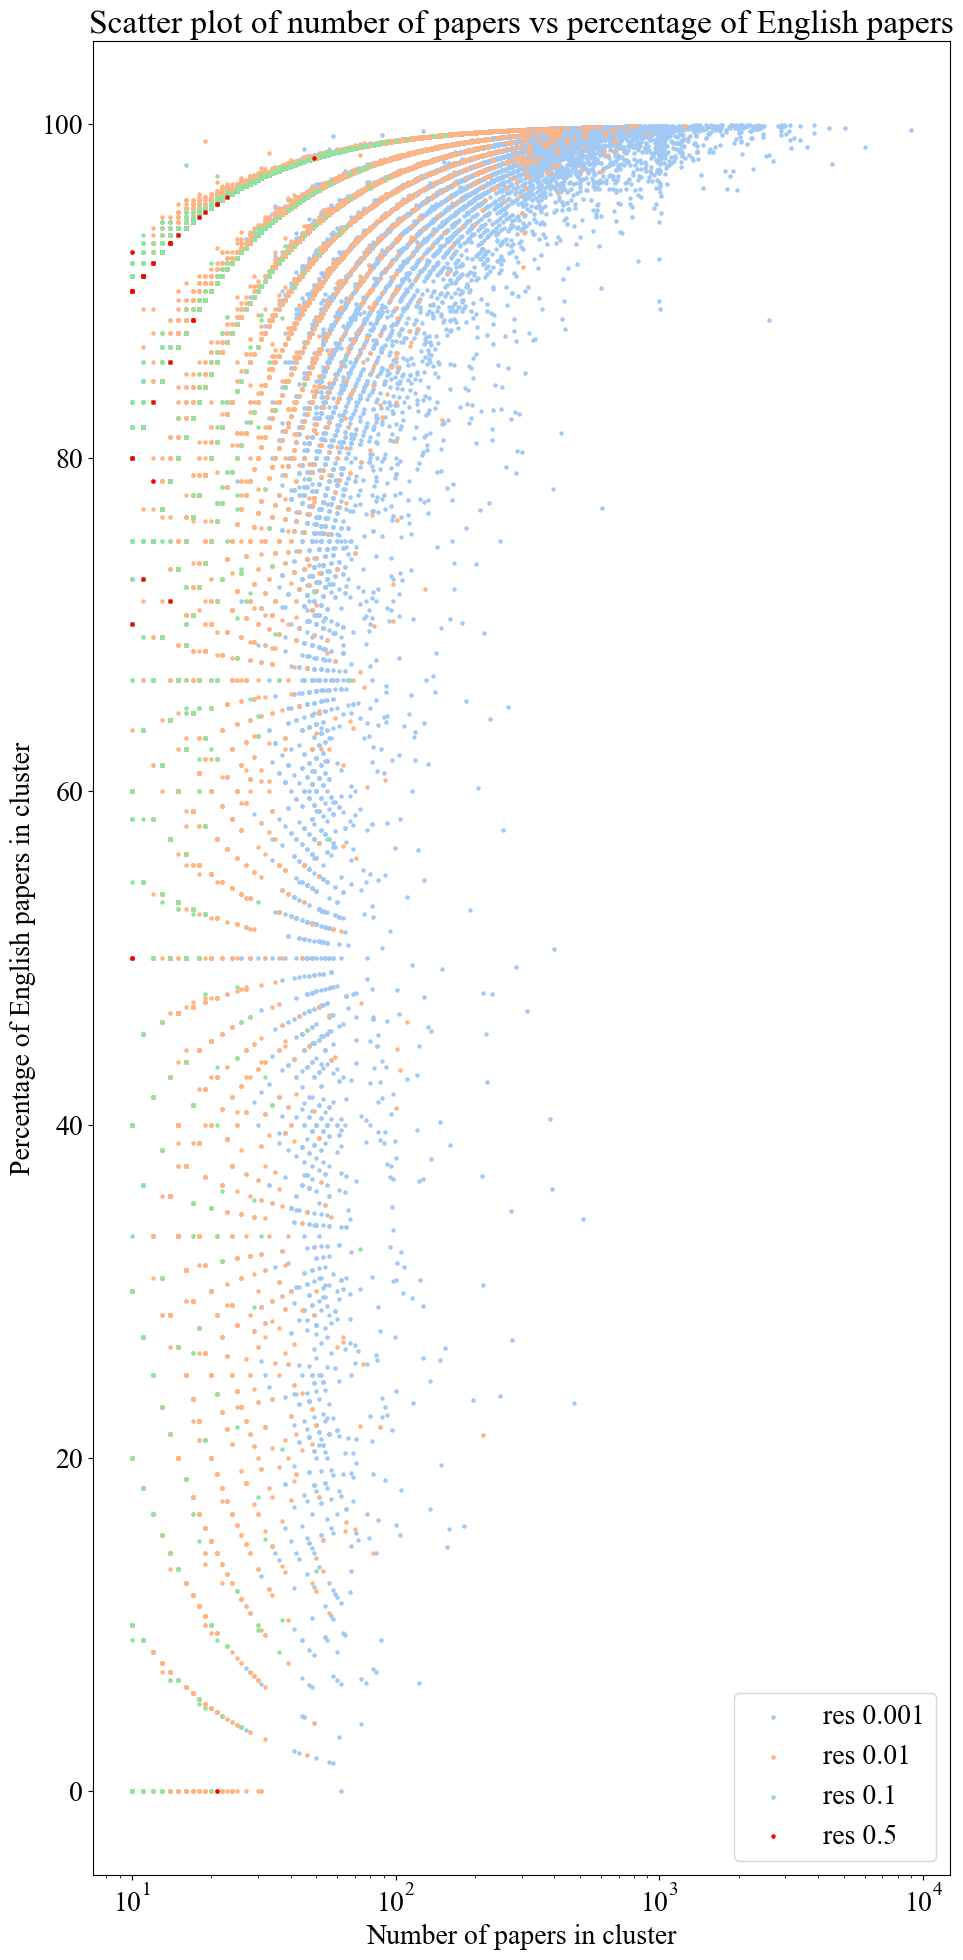

In [ ]:
cluster_comp_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/Filtered_S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.1_i2_clustering_cluster_comp_non_english.csv')
cluster_stats_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/Filtered_S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.1_i2_stats.csv')

cluster_comp_05 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.5_i2/Filtered_S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.5_i2_clustering_cluster_comp_non_english.csv')
cluster_stats_05 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.5_i2/Filtered_S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.5_i2_stats.csv')

cluster_comp_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/Filtered_S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.01_i2_clustering_cluster_comp_non_english.csv')
cluster_stats_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/Filtered_S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.01_i2_stats.csv')

cluster_comp_0001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/Filtered_S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.001_i2_clustering_cluster_comp_non_english.csv')
cluster_stats_0001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/Filtered_S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.001_i2_stats.csv')

# Ensure all cluster columns in stats are strings
cluster_stats_01['cluster'] = cluster_stats_01['cluster'].astype(str)
cluster_stats_05['cluster'] = cluster_stats_05['cluster'].astype(str)
cluster_stats_001['cluster'] = cluster_stats_001['cluster'].astype(str)
cluster_stats_0001['cluster'] = cluster_stats_0001['cluster'].astype(str)

# Ensure all cluster_id columns in comp are strings
cluster_comp_01['cluster_id'] = cluster_comp_01['cluster_id'].astype(str)
cluster_comp_05['cluster_id'] = cluster_comp_05['cluster_id'].astype(str)
cluster_comp_001['cluster_id'] = cluster_comp_001['cluster_id'].astype(str)
cluster_comp_0001['cluster_id'] = cluster_comp_0001['cluster_id'].astype(str)

# Join the two tables, only get column 'n' from cluster_stats and only get the rows in cluster_comp that are in cluster_stats
cluster_comp_01 = cluster_comp_01.join(cluster_stats_01.set_index('cluster'), on='cluster_id')[['cluster_id', 'en', 'n']]
cluster_comp_05 = cluster_comp_05.join(cluster_stats_05.set_index('cluster'), on='cluster_id')[['cluster_id', 'en', 'n']]
cluster_comp_001 = cluster_comp_001.join(cluster_stats_001.set_index('cluster'), on='cluster_id')[['cluster_id', 'en', 'n']]
cluster_comp_0001 = cluster_comp_0001.join(cluster_stats_0001.set_index('cluster'), on='cluster_id')[['cluster_id', 'en', 'n']]

# Set the Seaborn pastel palette
sns.set_palette("pastel")

# Create a figure with a grid of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 20))

# Plot scatter plot on the right column
ax.scatter(cluster_comp_0001['n'], cluster_comp_0001['en'], s=5, label='res 0.001')
ax.scatter(cluster_comp_001['n'], cluster_comp_001['en'], s=5, label='res 0.01')
ax.scatter(cluster_comp_01['n'], cluster_comp_01['en'], s=5, label='res 0.1')
ax.scatter(cluster_comp_05['n'], cluster_comp_05['en'], s=5, label='res 0.5', color='red')

# Use a log scale for the x axis
ax.set_xscale('log')

ax.legend()

ax.set_xlabel('Number of papers in cluster')
ax.set_ylabel('Percentage of English papers in cluster')
ax.set_title('Scatter plot of number of papers vs percentage of English papers')


# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
low_en = cluster_comp_0001[cluster_comp_0001['en'] < 50]

In [ ]:
low_en

,cluster_id,en,n
1205,1317,34.362934,514
1389,1527,23.319328,476
1895,2116,36.153846,390
1936,2167,40.310078,386
2672,3027,46.788991,314
...,...,...,...
37600,70096,10.000000,10
37603,70152,0.000000,10
37604,70153,20.000000,10
37605,70159,0.000000,10


In [ ]:
# Load the TSV file without headers and indices
citation_events_df = pd.read_csv('/Users/vikram/Documents/Work/NII/data/cleaned/oc_citation_events_last_5_years_int_el.cleaned.filtered.tsv', sep='\t', header=None, index_col=False)

# Display the first few rows of the dataframe
citation_events_df.head()

,0,1
0,1768545,2444575
1,1768545,4553441
2,1768545,6282944
3,1768545,9040945
4,1768545,1787749


In [ ]:
clustering = pd.read_csv('/Users/vikram/Documents/Work/NII/data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.001_i2_clustering.tsv',sep='\t', header=None, index_col=False)

In [ ]:
clustering.columns = ['node_id', 'cluster_id']
clustering

,node_id,cluster_id
0,1768545,17
1,2444575,17
2,4553441,1217
3,6282944,22260
4,9040945,600
...,...,...
7417322,1426442,6014
7417323,8124777,44502
7417324,5515509,3984
7417325,5515600,3984


In [ ]:
cl1317 = clustering[clustering['cluster_id'] == 1317]['node_id'].to_list()

citation_events_df.columns = ['citing', 'cited']

# Get the citation events where the citing paper and cited paper are both in cluster 1317
cl1317_citations = citation_events_df[(citation_events_df['citing'].isin(cl1317)) & (citation_events_df['cited'].isin(cl1317))]



In [ ]:
langdata = pd.read_csv('/Users/vikram/Documents/Work/NII/data/cleaned/oc_corroborated_langdata.csv')

In [ ]:
langdata.head()

,doi,id,title,publication_year,language,type,type_crossref,open_access,accepted,published,country,cited_by_count,field,subfield
0,10.1007/s40274-019-6237-3,1,SC insulin infusion pump in T1DM: health gains...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,"Endocrinology, Diabetes and Metabolism"
1,10.1007/s40274-019-6231-9,2,Modelling approaches should be justified in ec...,2019,en,article,journal-article,False,False,False,NaN,0,"Economics, Econometrics and Finance",Economics and Econometrics
2,10.1007/s40274-019-6225-7,4,Ferric carboxymaltose for iron deficiency in d...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,Hematology
3,10.1007/s40274-019-6223-9,5,ED-SAFE intervention cost effective for suicid...,2019,en,article,journal-article,False,False,False,NaN,0,Psychology,Clinical Psychology
4,10.1007/s40274-019-6224-8,7,Fecal transplants cost effective for recurrent...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,Infectious Diseases


In [ ]:
# Get only the nodes in cluster 1317 from the language data and only rhe id and language columns
langdata_1317 = langdata[langdata['id'].isin(cl1317)][['id', 'language']]
langdata_1317

,id,language
14149,23470,en
14214,23567,id
14227,23589,en
14265,23648,en
14338,23748,id
...,...,...
7130725,10831613,id
7178430,10907240,en
7407678,11252928,id
7407706,11252991,id


In [ ]:
# Using clustering and citation_events_df, get all edges where one node is in cluster 1317 and the other is not, store the cluster id of the non-1317 node
edges_1317 = citation_events_df[(citation_events_df['citing'].isin(cl1317)) & (~citation_events_df['cited'].isin(cl1317))]
edges_1317['cluster_id'] = edges_1317['cited'].apply(lambda x: clustering[clustering['node_id'] == x]['cluster_id'].values[0])
edges_1317

/var/folders/xb/ttq_ycbj3x7013f1p015bhv00000gn/T/ipykernel_2377/46688774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_1317['cluster_id'] = edges_1317['cited'].apply(lambda x: clustering[clustering['node_id'] == x]['cluster_id'].values[0])


,citing,cited,cluster_id
439130,10808527,3001615,22237
439131,10808527,7575305,2048
439132,10808527,3001733,3499
439136,10808527,10791958,15443
591937,6183672,7719140,31791
...,...,...,...
21196785,3700927,2041225,3499
21196786,3700927,6184067,3727
21196787,3700927,619419,3641
21196791,3700927,8184435,15443
